In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def MCMC_int(func, pars, pi, rng, num_samples, proposal_sigma=1.0):
    xi = np.random.uniform(*rng)
    s  = 0.0
    n = 0
    x = np.array([], dtype=np.float)
    for i in range(num_samples):
        if xi>=rng[0] and xi<rng[1]:
            s += func(xi, pars)
            n += 1
        x = np.append(x, xi)
        xg = np.random.normal(xi, proposal_sigma)
        #xg = np.random.uniform(*rng)
        if np.random.uniform(0,1) < pi(xg)/pi(xi):
            xi = xg
    return s/float(n),x

In [3]:
def func(x,n):
    return g(x)*f(x,n)

def g(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)
    #return x*np.exp(-x**2/2)

def f(x,n):
    return x**n

In [20]:
xlo = -4
xhi = 4
norm = integrate.quad(g, xlo, xhi)[0]
val, err = integrate.quad(func,xlo, xhi, args=(4))
nsamples = [i*10 for i in range(1,150)]
ivals    = [norm*MCMC_int(f, 4, g, [xlo, xhi], i)[0] for i in nsamples]

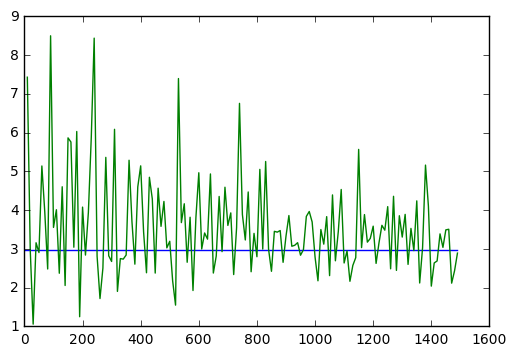

In [21]:
plt.plot([1, nsamples[-1]], [val, val])
plt.plot(nsamples, np.array(ivals))

In [22]:
xlo = 0
xhi = 4
norm = integrate.quad(g, xlo, xhi)[0]
val, err = integrate.quad(func,xlo, xhi, args=(4))
nsamples = [i*10 for i in range(1,150)]
ivals    = [norm*MCMC_int(f, 4, g, [xlo, xhi], i)[0] for i in nsamples]

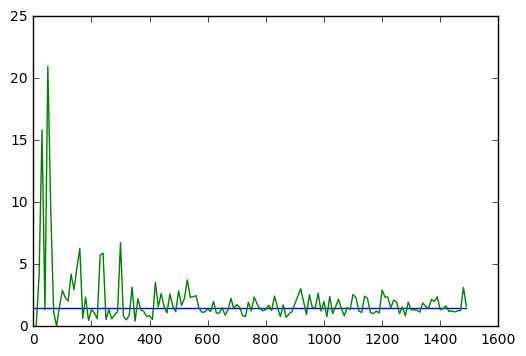

In [23]:
plt.plot([1, nsamples[-1]], [val, val])
plt.plot(nsamples, np.array(ivals))

In [25]:
xlo = 0
xhi = 1
val = integrate.quad(func,xlo, xhi, args=(2))[0]#/integrate.quad(func,xlo, xhi, args=(4))[0]
nsamples = [i*10 for i in range(1,150)]
norm = integrate.quad(g, xlo, xhi)[0]
ivals    = [norm*MCMC_int(f, 2, g, [xlo, xhi], i)[0] for i in nsamples]

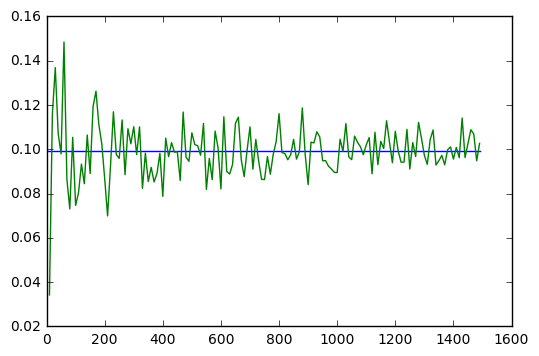

In [26]:
plt.plot([1, nsamples[-1]], [val, val])
plt.plot(nsamples, np.array(ivals))